<a href="https://colab.research.google.com/github/AlfaroDev/NLP-Entrega-final-Grupo-8/blob/main/Entregable_Actividad_2_Clasificacion_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: Clasificación de Noticias Usando RNNs y LSTMs

### Propósito de Aprendizaje
Adquirir habilidades prácticas en el preprocesamiento de datos textuales y en la implementación de modelos avanzados de RNN y LSTM para la clasificación de noticias en categorías especializadas como deportes, cultura, economía y justicia. Al finalizar, los estudiantes habrán desarrollado la capacidad de construir, entrenar y evaluar estos modelos, así como de comparar su rendimiento de manera crítica.

### Producto(s)
- **Cuaderno Jupyter (Jupyter Notebook):** Documentar el proceso completo de preprocesamiento, construcción, entrenamiento, evaluación y comparación de modelos RNN y LSTM.
- **Informe (PDF/Markdown):** Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones prácticas de los resultados.


### Ejercicio 1: Carga y Exploración de Datos
**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

**Acciones:**
- Cargar el archivo `Noticias.xlsx` que contiene las noticias.
- Explorar la distribución de la columna `Etiqueta` para ver cuántas noticias pertenecen a cada categoría.
- Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

**Contexto:** La columna `Etiqueta` en el conjunto de datos contiene varias categorías, algunas de las cuales no son especializadas o no contienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.


In [ ]:
# prompt: Clonar reposito de github del proyecto

!git clone https://github.com/czambranobetancourt/nlp_ean.git

Cloning into 'nlp_ean'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 188 (delta 28), reused 21 (delta 21), pack-reused 151 (from 1)
Receiving objects: 100% (188/188), 223.60 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Updating files: 100% (31/31), done.


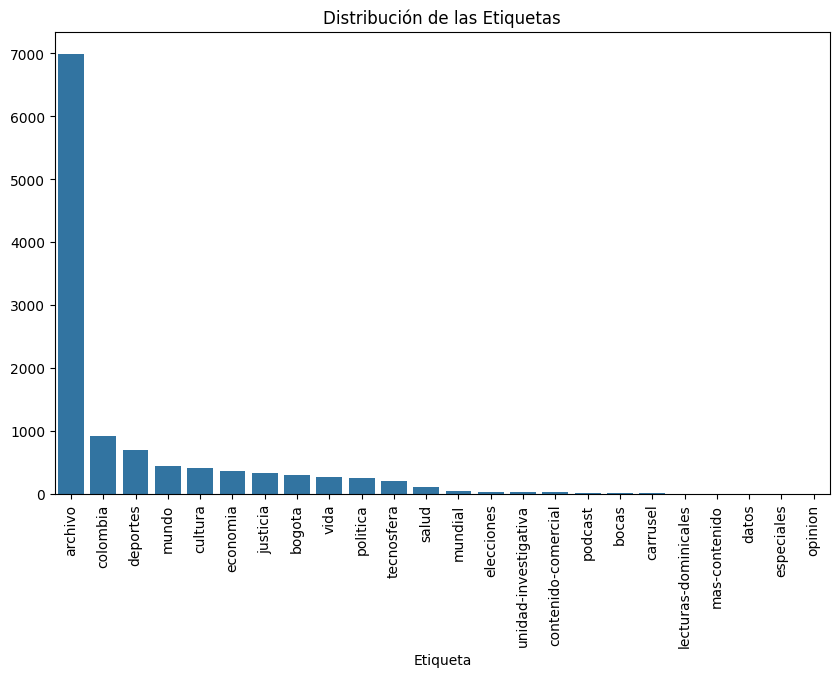

In [ ]:
# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '/content/nlp_ean/Datos/Datos Crudos/Noticias.xlsx'
data = pd.read_excel(file_path)

## Quitamos los nulos
data = data.dropna()

# Mostrar las primeras filas del conjunto de datos
data.head()

# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
#sns.countplot(data['Etiqueta'])
s = data['Etiqueta'].value_counts()
s = data['Etiqueta'].value_counts().rename_axis('Etiqueta').rename('count')
sns.barplot(x=s.index, y=s.values, order=s.index)
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

### Ejercicio 2: Filtrado de Datos
**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

**Acciones:**
- Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
- Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.


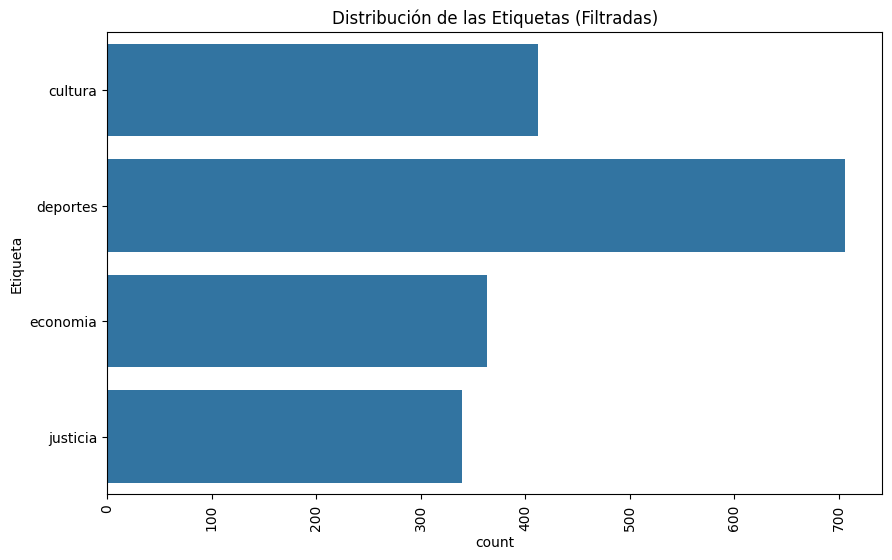

In [ ]:
# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]

# Visualizar la distribución de las etiquetas después del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribución de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()



### Ejercicio 3: Preprocesamiento de Texto
**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
- Convertir todo el texto a minúsculas para uniformidad.
- Eliminar puntuación y números para reducir el ruido en los datos.
- Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
- Tokenizar el texto, es decir, dividir el texto en palabras individuales.


Para este ejercicio debe instalarse la libreria keras y tensorflow, para ello se debe ejecutar el siguiente comando en la consola de anaconda:
```python
pip install keras tensorflow
```

In [ ]:
!pip install keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras_nlp
import tensorflow as tf
import re
# Descargar recursos de NLTK
#nltk.download('punkt')
nltk.download('punkt_tab')
#nltk.download('stopwords')


# Función de preprocesamiento
def preprocess_text(text):
  #text = text.lower()
  #text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
  oracion_a_eliminar = "Miedo 11:19 p.m. Ejercite su mente en la cuarentena con este test de lógica matemática Ponga a prueba esas clases de matemáticas del colegio y de la vida par ... Manizales 10:00 p.m. Ya se venden medicamentos de cannabis con fórmula médica En farmacias especializadas de Colombia es posible acceder a medicamen ... Manizales 10:00 p.m. El guía de la salud mental del pueblo con más casos de bipolaridad Coronavirus en Colombia 09:31 p.m. Una cabina de desinfección manual para Barranquilla Valle del Cauca 07:50 p.m. Se han recogido cerca de 132 mil mercados en 'Donatón Valle Solidario'"
  #oracion_a_eliminar = re.escape(oracion_a_eliminar)
  nuevo_texto = re.sub(oracion_a_eliminar, '', text)
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
  nuevo_texto = re.sub("p\.m|p\. m", 'pm', nuevo_texto) #ajustar pm
  nuevo_texto = re.sub("a\.m|a\. m", 'am', nuevo_texto) #ajustar am
  nuevo_texto = re.sub("No\.\s(?=[0-9])", 'No ', nuevo_texto) #ajustar ajustar nomenclatura de actas
  nuevo_texto = re.sub("vs." , 'vs', nuevo_texto) #elimina las horas
  nuevo_texto = re.sub("\d+\:\d+\sa\.m" , ' ', nuevo_texto) #elimina las horas
  nuevo_texto = re.sub(r"(?<=\.)[^.]*$", "", nuevo_texto, 1, re.DOTALL)
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
  nuevo_texto = re.sub("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}" , ' ', nuevo_texto) #Eliminación de correos electrónicos
  nuevo_texto = re.sub("[#|@](\w+)" , ' ', nuevo_texto) #Eliminación de etiquetas de tweets, instagram y facebook
  nuevo_texto = re.sub('https\S+', ' ', nuevo_texto) # Eliminación de páginas web (palabras que empiezan por "http")
  nuevo_texto = re.sub('www\S+', ' ', nuevo_texto) # Eliminación de páginas web (palabras que empiezan por "www")
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
  re.sub(r"(?<!www\.)([\w-]+\.(?!\d+)[\w-]+)", ' ', nuevo_texto) #Eliminación de paginas web que no comienzan con wwww
  regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\-\\/\\<\\=\\>\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\“\\”\\–\\‘\\’\\¡\\´\\ª\\—\\´\\£\\«\\»\\©\\®\\°\\·\\…\\•\\¼\\½\\ª]'
  nuevo_texto = re.sub(regex , ' ', nuevo_texto)
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
  # Define la oración que quieres eliminar

  tokens = re.split(r"\.\s(?=[A-Z0-9])|\.\:|\¿|\?", nuevo_texto)
  regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\;\\<\\:\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\“\\”\\–\\‘\\’\\¿\\¡\\´\\ª\\—\\´\\£\\«\\»\\©\\®\\°\\·\\…\\•\\¼\\½\\ª]'
  tokens = [re.sub(regex , '', token) for token in tokens]
  tokens = [re.sub("\\s+", ' ', token) for token in tokens]
  #patron_hora = r'\d{1,2}:\d{2}(:\d{2})?'
  #tokens = [re.sub(r'(?:\d{1,2}:\d{2}(?::\d{2})?)?(:)(?!\d)', r'\1', token) for token in tokens]
  tokens = [token.strip() for token in tokens]
  tokens = [token for token in tokens if len(token) != 0 and token != " "]
  #regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\“\\”\\–\\‘\\’\\¿\\¡\\´\\ª\\—\\´\\£\\«\\»\\©\\®\\°\\·\\…\\•\\¼\\½\\ª]'
  #nuevo_texto = re.sub(regex , ' ', nuevo_texto)
  #nuevo_texto = re.sub("\d+", ' ', nuevo_texto) #Eliminación de numeros
  #nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
  #tokens = word_tokenize(nuevo_texto)
  #tokens = [word for word in tokens if word not in stopwords.words('spanish')]
  #return ' '.join(nuevo_texto)
  return tokens

# Aplicar preprocesamiento
data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-5-bf48012ff364>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)


In [ ]:
data_filtrada = data_filtrada[['contenido_preprocesado', 'Etiqueta']]
data_filtrada_new = data_filtrada.explode('contenido_preprocesado')
data_filtrada.head()

,contenido_preprocesado,Etiqueta
10487,[Citas Los crímenes de violencia sexual cometi...,cultura
10488,[Con motivo de la celebración de los 20 años d...,cultura
10489,[El cuadro Busto de mujer del artista español ...,cultura
10490,[El Carnaval de las Artes organizado en Barran...,cultura
10491,[Louise du Toit filósofa el doctor Denis Mukwe...,cultura


In [ ]:
data_filtrada_new.head()

,contenido_preprocesado,Etiqueta
10487,Citas Los crímenes de violencia sexual cometid...,cultura
10487,Tres casos en los que al interior de no es otr...,cultura
10487,Se trata de un galicismo introducido al país p...,cultura
10487,Al interior de es válido solo con verbos de mo...,cultura
10487,Nótese cómo este al interior de es necesario p...,cultura


In [ ]:
data_filtrada_new['palabras'] = data_filtrada_new['contenido_preprocesado'].apply(lambda x: len(x.split()))
data_filtrada_new.head()

,contenido_preprocesado,Etiqueta,palabras
10487,Citas Los crímenes de violencia sexual cometid...,cultura,43
10487,Tres casos en los que al interior de no es otr...,cultura,36
10487,Se trata de un galicismo introducido al país p...,cultura,14
10487,Al interior de es válido solo con verbos de mo...,cultura,22
10487,Nótese cómo este al interior de es necesario p...,cultura,17


In [ ]:
data_filtrada_new.to_csv('data_filtrada_new.csv', index=False)

In [ ]:
data_filtrada_new['palabras'].describe()

,palabras
count,40077.000000
mean,23.993837
std,15.747215
min,1.000000
25%,12.000000
50%,21.000000
75%,33.000000
max,181.000000


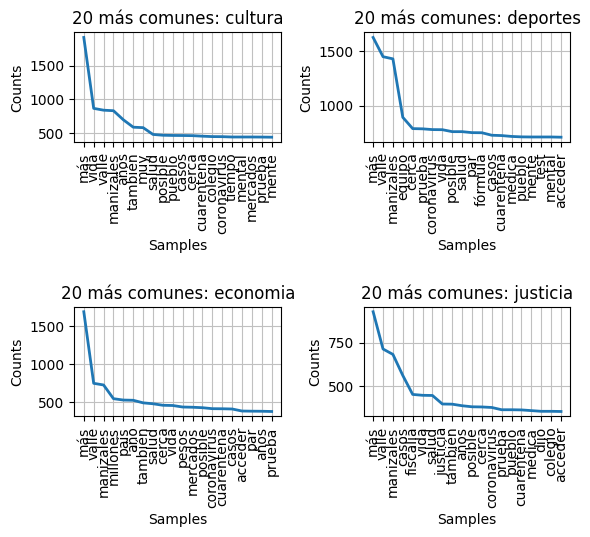

In [ ]:
plt.figure()

i = 1
for k, v in fdist.items():
    #fig.add_subplot(2,2,i)
    plt.subplot(2,2,i)
    plt.title('20 más comunes: ' + k)
    v.plot(20)
    i= i+1
plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.5)
plt.show()

In [ ]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_filtrada_new['contenido_preprocesado'])
sequences = tokenizer.texts_to_sequences(data_filtrada_new['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[ 5325,     8,  2691,     1,   393,   756,  4880,    20,  1205,
            1,    12,   117,  1631,     2,  4491,  8166,  8837,     4,
         1386,  9695,  1689,    94, 16466,    20,  1205,     1,  8838,
            5,  6241, 16467,   844,     1,   611,  1690, 12111,    20,
         1205,     1,    19,   158, 20486,     1,  2501,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   76,   232,     5,     8,     4,    20,  1205,     1,    18,
           17,   200,  1142,     4,     3,  4676, 13885,   105, 12112,
            1,     2,  3081, 13886,     5,     5,    12,   11

### Ejercicio 4: División del Conjunto de Datos
**Objetivo:** Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

**Acciones:**
- Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
- Asegurarse de que la división sea aleatoria pero mantenga una proporción similar de las categorías en ambos conjuntos.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Codificación de etiquetas
label_encoder = LabelEncoder()
data_filtrada_new['Etiqueta_codificada'] = label_encoder.fit_transform(data_filtrada_new['Etiqueta'])

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_filtrada_new['Etiqueta_codificada'], test_size=0.2, random_state=42)

# ======================================= Balanceo =======================================================

oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = oversampler.fit_resample(X_train, y_train)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)


(32061, 8016)

## Ejercicio 5: Construcción y Entrenamiento de Modelos RNN

**Objetivo:** Implementar un modelo de Red Neuronal Recurrente (RNN) para clasificar noticias en las categorías especializadas.

**Acciones:**
- Construir un modelo RNN utilizando capas de Embedding, SimpleRNN y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1002/1002 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.3082 - loss: 1.3711 - val_accuracy: 0.3709 - val_loss: 1.3183 - learning_rate: 5.0000e-05
Epoch 2/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 31s 31ms/step - accuracy: 0.3897 - loss: 1.2843 - val_accuracy: 0.4409 - val_loss: 1.1948 - learning_rate: 5.0000e-05
Epoch 3/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.5009 - loss: 1.0953 - val_accuracy: 0.4943 - val_loss: 1.0656 - learning_rate: 5.0000e-05
Epoch 4/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.5927 - loss: 0.9256 - val_accuracy: 0.5309 - val_loss: 1.0022 - learning_rate: 5.0000e-05
Epoch 5/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.6529 - loss: 0.7949 - val_accuracy: 0.5490 - val_loss: 0.9913 - learning_rate: 5.0000e-05
Epoch 6/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.7086 - loss: 0.6817 - val_accuracy: 0.5828 - val_loss: 0.9474 - learning_rate: 5.0000e-05
Epoch 7/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/

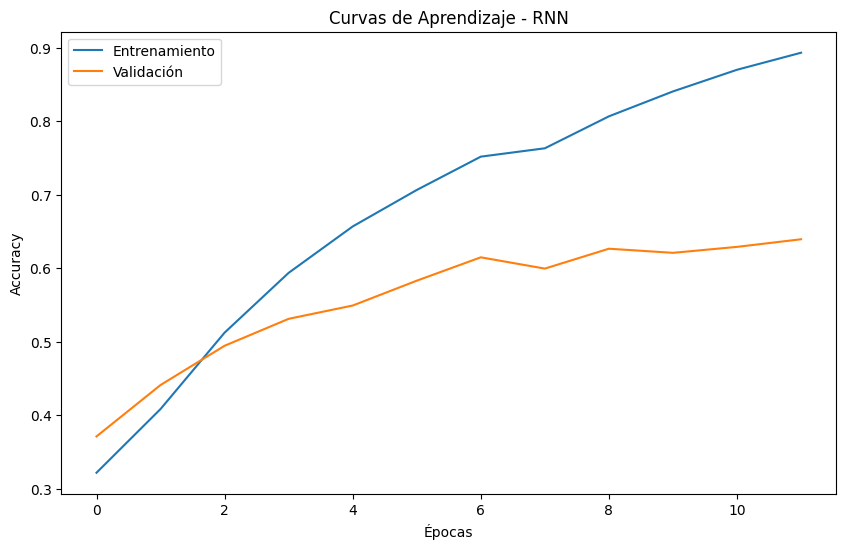

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

"""
# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
#model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train_smote, y_train_smote, validation_data=(X_val, y_val), epochs=10, batch_size=32)
"""
"""
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=True)))  # Primera capa RNN
model_rnn.add(Dropout(0.5))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))  # Segunda capa RNN
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=128, activation='relu'))  # Capa completamente conectada adicional
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))"""

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=50, input_length=max_len))
#model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Bidirectional(SimpleRNN(units=64, return_sequences=False)))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00005)
Optimizaer = tf.keras.optimizers.Adam(learning_rate=0.00005)
model_rnn.compile(optimizer=Optimizaer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val),
                            epochs=20, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()

## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.

**Acciones:**

- Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import keras_nlp
import tensorflow as tf
import re

In [ ]:
data_filtrada_new['targets'] = data_filtrada['Etiqueta'].astype("category").cat.codes
K = data_filtrada_new['targets'].max()+1

In [ ]:
word_index = tokenizer.word_index
V = len(word_index)
print('%s unique tokens.' % V)

Found 50181 unique tokens.


In [ ]:
T = X_train.shape[1]
print(T) #Cantidad de columnas de datos de entrenamiento
print(V)
print(K)
D = 10 #Vector de cantidad de palabras
i = Input(shape=(T,)) #Definir la capa de entrada de la red neuronal, se indican secuencia de entrada del tamaño T
x = Embedding(V + 1, D)(i) #Se crea la capa de incrustación con la cantidad única de Tokens
x = LSTM(32, return_sequences=True)(x) #Se agraga una capa LSTM con 32 unidades, la capa genera secuencias para cada palabra
x = GlobalMaxPooling1D()(x) #Agrupación máxima global a la salida de la capa. Toma el valor máximo en toda la secuencia para cada dimensión de característica.
x = Dropout(0.5)(x) #Capa para prevenir el sobreajuste
x = Dense(K, activation='softmax')(x) #Capa de salida

modelo_1 = Model(i, x)

100
50181
4


Entrenando el modelo
Epoch 1/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3909 - loss: 1.2775 - val_accuracy: 0.6351 - val_loss: 0.8883 - learning_rate: 0.0010
Epoch 2/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6775 - loss: 0.7950 - val_accuracy: 0.7701 - val_loss: 0.6812 - learning_rate: 0.0010
Epoch 3/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8049 - loss: 0.5463 - val_accuracy: 0.7828 - val_loss: 0.6453 - learning_rate: 0.0010
Epoch 4/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8624 - loss: 0.4498 - val_accuracy: 0.7992 - val_loss: 0.5976 - learning_rate: 0.0010
Epoch 5/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9079 - loss: 0.3093 - val_accuracy: 0.7968 - val_loss: 0.6609 - learning_rate: 0.0010
Epoch 6/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9332 - loss: 0.2295 - val_accuracy: 0.8081 - val_loss: 0.7130 - learning_rate: 0.0010
Epoch 7/20
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/s

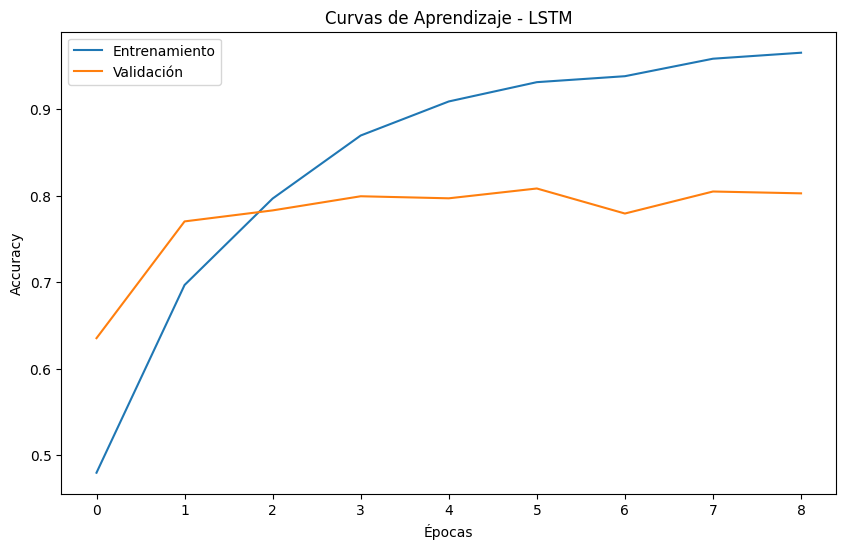

In [ ]:
modelo_1.compile(
    loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

print("Entrenando el modelo")
r_1 = modelo_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20, batch_size=32, callbacks=[early_stopping, reduce_lr]
)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(r_1.history['accuracy'], label='Entrenamiento')
plt.plot(r_1.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()

In [ ]:
modelo_1.save('modelo_1.h5')

In [ ]:
modelo_1.save('modelo_1.keras')

# Ejercicio extra: Implementación de transformer con BETO

Objetivo: Construir y entrenar un modelo BERT para clasificar las noticias.

Acciones:

Utilizar la biblioteca transformers de Hugging Face para cargar el modelo BERT preentrenado.
Ajustar el modelo con el conjunto de datos de entrenamiento.
Evaluar el modelo utilizando un conjunto de datos de validación.

## a. Instalación de librerías

In [ ]:
!pip install "transformers >= 4.41.2"
!pip install sympy --upgrade
!pip3 install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 50.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.1

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
from transformers import BertTokenizer
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
file_path = '/content/nlp_ean/Datos/Datos Crudos/Noticias.xlsx'
data_crudo = pd.read_excel(file_path)

# Eliminar las filas con valores faltantes
data_crudo.dropna(inplace=True)

# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data = data_crudo[data_crudo['Etiqueta'].isin(categorias_relevantes)]

# Tokenizar los datos
tokenizer = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased")
data['input_ids'] = data['contenido'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/480k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/648 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (839 > 512). Running this sequence through the model will result in indexing errors
<ipython-input-49-0113fdc89546>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input_ids'] = data['contenido'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))


In [ ]:
# Estandarización de longitud de input_ids
max_len = 128
data['input_ids'] = data['input_ids'].apply(lambda x: x[:max_len] + [0]*(max_len-len(x)) if len(x) < max_len else x[:max_len])

## Label encoding para columna Etiqueta

data['Etiqueta'].replace("deportes" , 0, inplace=True)
data['Etiqueta'].replace("cultura" , 1, inplace=True)
data['Etiqueta'].replace("economia" , 2, inplace=True)
data['Etiqueta'].replace("justicia" , 3, inplace=True)

<ipython-input-21-353122695614>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['input_ids'] = data['input_ids'].apply(lambda x: x[:max_len] + [0]*(max_len-len(x)) if len(x) < max_len else x[:max_len])
<ipython-input-21-353122695614>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


 

In [ ]:
# Dividir el conjunto de datos en entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train_po, X_val, y_train_po, y_val = train_test_split(data['input_ids'].tolist(), data['Etiqueta'].tolist(), test_size=0.2, random_state=42)

# Balanceo con SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_po, y_train_po)

# Convertir los datos a tensores
train_encodings = torch.tensor(X_train)
val_encodings = torch.tensor(X_val)
train_labels = torch.tensor(np.reshape(y_train, (-1,1)))
val_labels = torch.tensor(np.reshape(y_val, (-1,1)))

## attention masks

train_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_train])
val_masks = torch.tensor([[float(i != 0) for i in ii] for ii in X_val])

# Conteo de registros balanceados
from collections import Counter
print(Counter(y_train))

Counter({1: 571, 2: 571, 3: 571, 0: 571})


## b. Implementación de BERT

In [ ]:
from transformers import AutoModelForSequenceClassification

# Definir el mapeo de labels
id2label = {0: "deportes", 1: "cultura", 2:"economia", 3:"justicia"}
label2id = {"deportes": 0, "cultura": 1, "economia":2, "justicia":3}

labels = list(id2label.keys())

# Cargar el modelo preentrenado de BETO, versión en español del modelo BERT, en versión cased para que tenga en cuenta mayúsculas y minúsculas.
# El problem_type es single_label_classification para clasificación con una sola etiqueta (también conocida como clasificación multiclase)
model = AutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-cased",
                                                           num_labels=4,
                                                           problem_type="single_label_classification",
                                                           id2label=id2label,
                                                           label2id=label2id)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
import torch

# función para evaluar métricas de la clasificación
def multi_label_metrics(predictions, label, threshold=0.5):
    shape=predictions.shape
    # Utiliza softmax para calcular las probabilidades de cada label
    prob_values = torch.nn.functional.softmax(torch.Tensor(predictions), dim=-1)
    # Genera los arrays para comparar y calcular métricas
    y_pred = np.zeros(shape)
    y_pred[np.where(prob_values >= threshold)] = 1
    y_true = np.zeros(shape)
    y_true[np.arange(len(label)), label.flatten()] = 1

    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # retorna un diccionario
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

# Métricas de rendimento que serán reportadas durante el proceso de entrenamiento
def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        label=p.label_ids)
    return result

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 8
metric_name = "f1"

# parámetros para entrenamiento del modelo
args = TrainingArguments(
    output_dir="noticias_model",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=6,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",
    logging_steps = 286,
    label_names=['labels']
    #push_to_hub=True
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Entrenamiento de Datasets de entrenamiento y validación
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_dict({"input_ids": train_encodings, "attention_mask": train_masks, "labels": train_labels})
val_dataset = Dataset.from_dict({"input_ids": val_encodings, "attention_mask": val_masks, "labels": val_labels})

In [ ]:
from transformers import EarlyStoppingCallback
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=2,  # Número de épocas sin mejora para detener el entrenamiento
    early_stopping_threshold=0.01  # Umbral mínimo de mejora para continuar entrenando
)

In [ ]:
# Entrenamiento del modelo
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
    callbacks=[early_stopping_callback]
)

trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.625600,0.268121,0.942308,0.961538,0.942308
2,0.463900,0.244054,0.943604,0.961996,0.942308
3,0.376400,0.283780,0.935351,0.956502,0.934066
4,0.278500,0.292152,0.942308,0.961538,0.942308


TrainOutput(global_step=1144, training_loss=0.43609617806814766, metrics={'train_runtime': 291.9886, 'train_samples_per_second': 46.933, 'train_steps_per_second': 5.877, 'total_flos': 600956441739264.0, 'train_loss': 0.43609617806814766, 'epoch': 4.0})

In [ ]:
# Guarda el modelo
model_save_dir = '/Resultado'
print(f"[INFO] Saving model to {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

[INFO] Saving model to /Resultado


In [ ]:
from sklearn.metrics import classification_report

# Evaluar el modelo
results = trainer.evaluate()
print(results)

# Calcular métricas adicionales
predictions = trainer.predict(Dataset.from_dict({"input_ids": val_encodings, "labels": val_labels})).predictions
y_pred_BETO = predictions.argmax(axis=1)

{'eval_loss': 0.24405433237552643, 'eval_f1': 0.9436038514442916, 'eval_roc_auc': 0.9619963369963369, 'eval_accuracy': 0.9423076923076923, 'eval_runtime': 2.5059, 'eval_samples_per_second': 145.258, 'eval_steps_per_second': 18.357, 'epoch': 4.0}


In [ ]:
trainer.state.log_history

[{'loss': 0.6256,
  'grad_norm': 0.5138622522354126,
  'learning_rate': 1.6666666666666667e-05,
  'epoch': 1.0,
  'step': 286},
 {'eval_loss': 0.2681213915348053,
  'eval_f1': 0.9423076923076923,
  'eval_roc_auc': 0.9615384615384616,
  'eval_accuracy': 0.9423076923076923,
  'eval_runtime': 2.598,
  'eval_samples_per_second': 140.105,
  'eval_steps_per_second': 17.706,
  'epoch': 1.0,
  'step': 286},
 {'loss': 0.4639,
  'grad_norm': 6.345340251922607,
  'learning_rate': 1.3333333333333333e-05,
  'epoch': 2.0,
  'step': 572},
 {'eval_loss': 0.24405433237552643,
  'eval_f1': 0.9436038514442916,
  'eval_roc_auc': 0.9619963369963369,
  'eval_accuracy': 0.9423076923076923,
  'eval_runtime': 2.5489,
  'eval_samples_per_second': 142.805,
  'eval_steps_per_second': 18.047,
  'epoch': 2.0,
  'step': 572},
 {'loss': 0.3764,
  'grad_norm': 23.206851959228516,
  'learning_rate': 1e-05,
  'epoch': 3.0,
  'step': 858},
 {'eval_loss': 0.2837802767753601,
  'eval_f1': 0.9353507565337001,
  'eval_roc_au

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       135
           0       0.90      0.95      0.93        79
           2       0.89      0.94      0.91        78
           3       0.95      0.86      0.91        72

    accuracy                           0.94       364
   macro avg       0.94      0.93      0.93       364
weighted avg       0.94      0.94      0.94       364



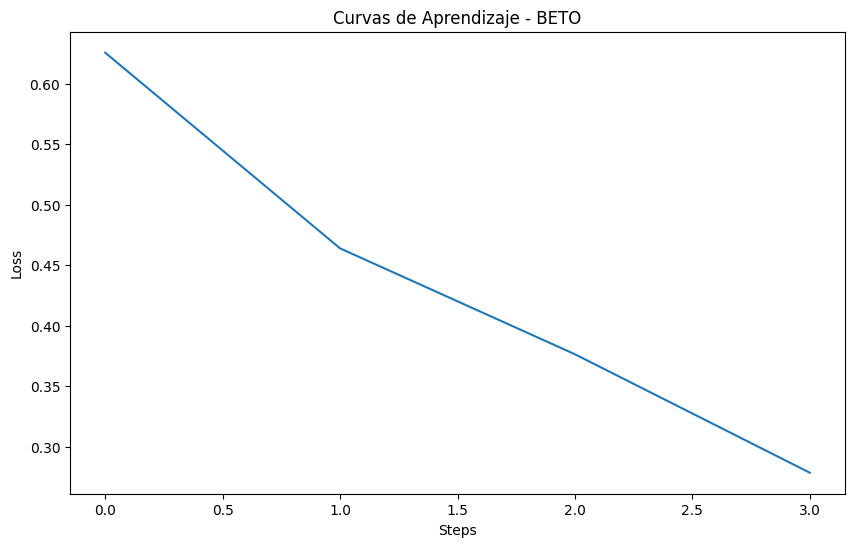

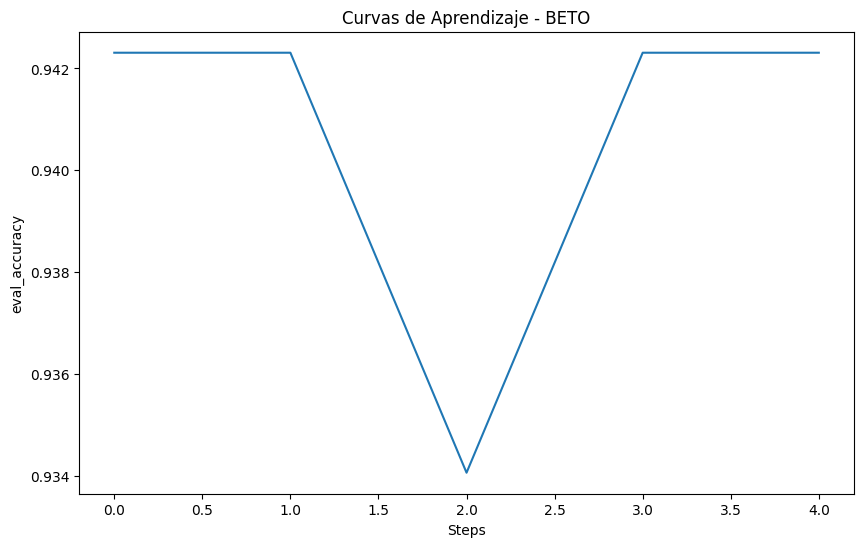

In [ ]:
target_names = [str(name) for name in data['Etiqueta'].unique()]
report_Beto = classification_report(y_val, y_pred_BETO, target_names=target_names)
print(report_Beto);

# Visualización de resultados
import matplotlib.pyplot as plt

loss_values = [d['loss'] for d in trainer.state.log_history if 'loss' in d]
eval_accuracy_values = [d['eval_accuracy'] for d in trainer.state.log_history if 'eval_accuracy' in d]
steps = np.arange(len(loss_values))
eval_accuracy_steps = np.arange(len(eval_accuracy_values))

plt.figure(1, figsize=(10, 6))
plt.plot(steps, loss_values)  # Graficar steps vs. loss values
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Curvas de Aprendizaje - BETO')
plt.show()

plt.figure(2, figsize=(10, 6))
plt.plot(eval_accuracy_steps, eval_accuracy_values)  # Graficar steps vs. eval_accuracy
plt.xlabel('Steps')
plt.ylabel('eval_accuracy')
plt.title('Curvas de Aprendizaje - BETO')
plt.show()

## Ejercicio 7: Comparación de Modelos y Análisis de Resultados

**Objetivo:** Comparar los modelos RNN y LSTM en términos de rendimiento y analizar los resultados obtenidos.

**Acciones:**
- Comparar la precisión y la pérdida de los modelos RNN y LSTM en el conjunto de datos de validación.
- Calcula otras métricas de evaluación como la sensibilidad, la especificidad y el puntaje F1.
- Discutir las fortalezas y debilidades de cada modelo en función de los resultados obtenidos.

251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.65      0.76      0.70      2650
     cultura       0.71      0.70      0.70      2274
    economia       0.49      0.52      0.50      1669
    justicia       0.50      0.32      0.39      1423

    accuracy                           0.61      8016
   macro avg       0.59      0.57      0.58      8016
weighted avg       0.61      0.61      0.61      8016

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.73      0.87      0.79      2650
     cultura       0.94      0.78      0.85      2274
    economia       0.75      0.78      0.77      1669
    justicia       0.84      0.71      0.77      1423

    accuracy                           0.80      8016
   macro avg       0.81      0.79      0.80      8016
weighted avg       0.81      0.80      0.80    

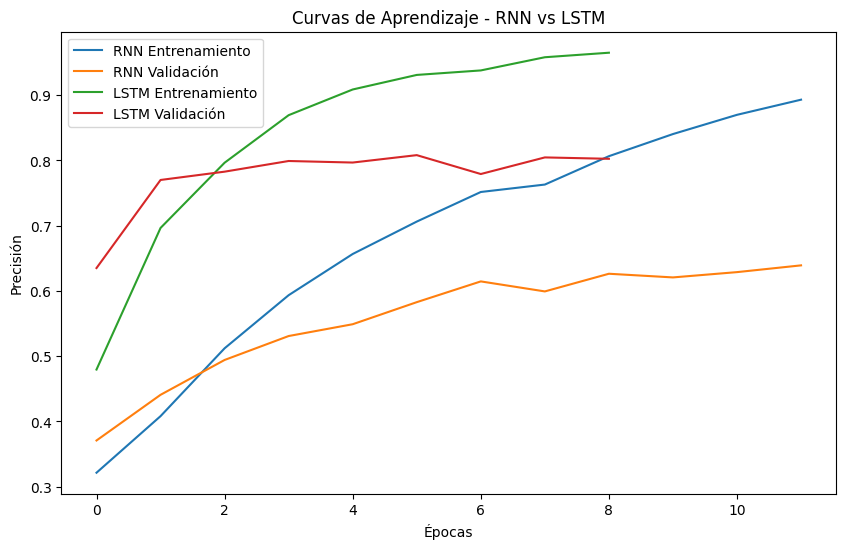

In [ ]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = modelo_1.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(r_1.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(r_1.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


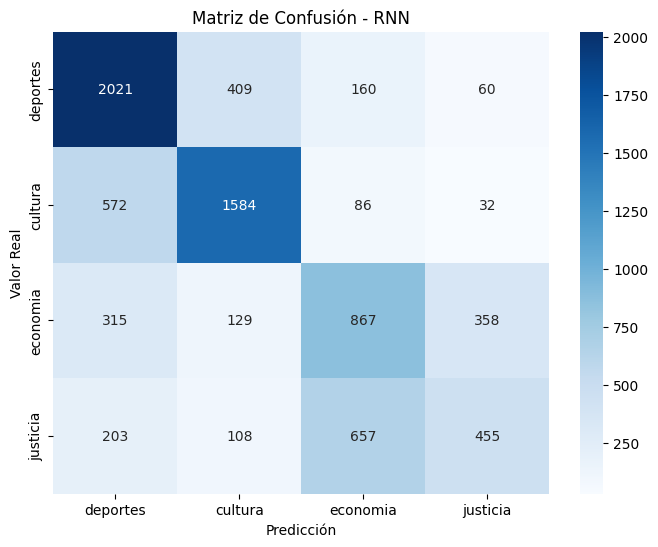

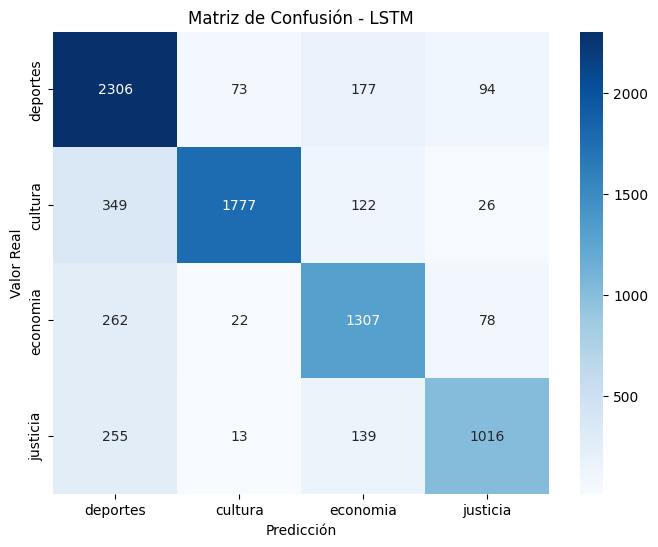

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = modelo_1.predict(X_val).argmax(axis=1)

# Calcular la matriz de confusión para el modelo RNN
cm_rnn = confusion_matrix(y_val, y_pred_rnn)

# Visualizar la matriz de confusión para el modelo RNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues",
            xticklabels=categorias_relevantes, yticklabels=categorias_relevantes)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - RNN")
plt.show()

# Calcular la matriz de confusión para el modelo LSTM
cm_lstm = confusion_matrix(y_val, y_pred_lstm)

# Visualizar la matriz de confusión para el modelo LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues",
            xticklabels=categorias_relevantes, yticklabels=categorias_relevantes)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - LSTM")
plt.show()


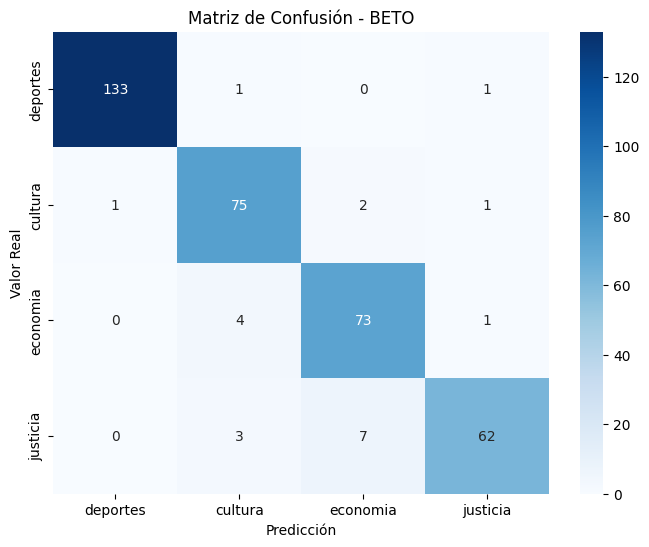

In [ ]:
# Calcular la matriz de confusión para el modelo BETO
cm_BETO = confusion_matrix(y_val, y_pred_BETO)

# Visualizar la matriz de confusión para el modelo BETO
plt.figure(figsize=(8, 6))
sns.heatmap(cm_BETO, annot=True, fmt="d", cmap="Blues",
            xticklabels=categorias_relevantes, yticklabels=categorias_relevantes)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - BETO")
plt.show()

## Ejercicio 8: Conclusiones y Recomendaciones

**Objetivo:** Resumir los hallazgos y proporcionar recomendaciones basadas en los resultados obtenidos.

**Acciones:**
- Resumir las principales conclusiones de la comparación entre los modelos RNN y LSTM.
- Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
- Discutir las implicaciones prácticas de los resultados y cómo podrían aplicarse en un contexto real.


# **Análisis General**
El modelo LSTM supera al RNN en todas las clases, especialmente en términos de recall (menor cantidad de falsos negativos).
Esto refleja la capacidad de las LSTM para manejar dependencias a largo plazo en datos secuenciales, algo crítico en tareas de clasificación de texto.

BETO tiene un rendimiento sobresaliente en todas las clases, con precisión y recall significativamente altos, reflejando su capacidad para capturar contextos bidireccionales y comprender mejor el significado de las palabras en su contexto.

# **Rendimiento por Clase**
1. **Deportes**

**RNN:** 2021 verdaderos positivos, 629 falsos negativos, 1090 falsos positivos.

**LSTM:** 2306 verdaderos positivos, 344 falsos negativos, 866 falsos positivos.

**BETO:** 133 verdaderos positivos, 2 falsos negativos, 1 falsos positivos.

**Conclusión:** LSTM muestra una mejora clara respecto al RNN, reduciendo significativamente los falsos negativos.
BETO casi no presenta errores en esta categoría, evidenciando su capacidad para identificar términos y patrones únicos en los textos relacionados con deportes.
2. **Cultura**

**RNN:** 1584 verdaderos positivos, 690 falsos negativos, 1090 falsos positivos.

**LSTM:** 1777 verdaderos positivos, 108 falsos negativos, 497 falsos positivos.

**BETO:** 75 verdaderos positivos, 4 falsos negativos, 8 falsos positivos.

**Conclusión:** LSTM mejora la clasificación de esta categoría, especialmente reduciendo los falsos negativos, lo que indica un mejor recall.
BETO, aunque con menos datos absolutos en esta categoría, mantiene un desempeño excepcional con pocos errores, lo que lo convierte en la mejor opción.

3. **Economía**

**RNN:** 867 verdaderos positivos, 802 falsos negativos, 903 falsos positivos.

**LSTM:** 1307 verdaderos positivos, 438 falsos negativos, 362 falsos positivos.

**BETO:** 73 verdaderos positivos, 5 falsos negativos, 9 falsos positivos.

**Conclusión:**
LSTM muestra un desempeño significativamente mejor que el RNN, logrando reducir tanto los falsos negativos como los falsos positivos.
BETO nuevamente lidera, aunque esta categoría presenta una leve confusión debido a la relación semántica con otras categorías como justicia o cultura.
4. **Justicia**

**RNN:** 455 verdaderos positivos, 968 falsos negativos, 450 falsos positivos.

**LSTM:** 1016 verdaderos positivos, 407 falsos negativos, 198 falsos positivos.

**BETO:** 62 verdaderos positivos, 10 falsos negativos, 3 falsos positivos.

**Conclusión:** LSTM supera ampliamente al RNN, mostrando mayor precisión y recall, lo que lo hace más confiable para esta clase.
BETO, aunque tiene un rendimiento ligeramente inferior en comparación con otras clases, sigue mostrando su capacidad para minimizar errores en la clasificación.
# **Recomendaciones para Mejorar el Rendimiento**
1. **Optimización de Hiperparámetros:**

- Realizar una búsqueda más exhaustiva de hiperparámetros para los modelos puede ayudar a mejorar su rendimiento.
- Ajustar el tamaño del lote, el número de épocas y la tasa de aprendizaje podría beneficiar el desempeño.
- Implementar GridSearch para encontrar los mejores hiperparámetros del modelo, en donde se pueden obtener beneficios como: Optimización Exhaustiva, prueba todas las combinaciones posibles de hiperparámetros.
Resultados Reproducibles, las pruebas son sistemáticas y documentadas y
Mejor Rendimiento, puede identificar configuraciones que maximicen el rendimiento del modelo.
2. **Aumento de Datos:**

- Si es posible, incrementar el tamaño del conjunto de datos de entrenamiento para mejorar la generalización del modelo.
- Utilizar técnicas de aumento de datos (como la generación de sinónimos o el reemplazo de palabras) puede ser útil.
3. **Arquitecturas Alternativas:**

- Considerar el uso de modelos más avanzados como Transformer, que han demostrado un rendimiento superior en tareas de NLP, probablemente otros modelos preentrenados también en español puedan lograr mejoras en el desempeño.
- Experimentar con combinaciones de modelos, como un híbrido de CNN y RNN, para capturar tanto características locales como temporales.
4. **Regularización y Dropout:**

- Implementar técnicas de regularización como el dropout o L2 regularization para reducir el sobreajuste.
- Asegurarse de que los modelos no están memorizando el conjunto de entrenamiento, sino aprendiendo patrones generales.
- Evitar el overfitting con técnicas como Early stopping.

**Modelo Final**: Si los recursos computacionales lo permiten, se recomienda utilizar BETO debido a su precisión y recall sobresalientes, particularmente en categorías con dependencias contextuales fuertes.

# **Implicaciones Prácticas de los Resultados**
1. **Aplicabilidad en Sistemas Reales:**

- LSTM: Basado en su mejor rendimiento general, el modelo LSTM es más adecuado para aplicaciones en sistemas reales donde la precisión y el recall son cruciales, como en la clasificación de noticias o la moderación de contenido.
- RNN: Aunque el rendimiento del RNN es inferior, podría ser utilizado en aplicaciones donde la precisión no es tan crítica o cuando se requiere menor capacidad computacional.
- BERT: Su capacidad para comprender el contexto de palabras en una oración lo hace adecuado para aplicaciones como clasificación de texto, NER, resumen, traducción,entre otros.
2. **Impacto en la Experiencia del Usuario:**

- Modelos con mejor precisión y recall (como el LSTM) proporcionan resultados más fiables, lo que puede mejorar la experiencia del usuario al reducir el número de errores de clasificación.
- Implementar modelos más precisos puede aumentar la confianza del usuario en el sistema, especialmente en aplicaciones sensibles como la clasificación de contenido en plataformas de redes sociales o sistemas de recomendación.
3. **Costos Computacionales:**

- Los modelos LSTM, aunque más precisos, suelen ser más costosos en términos de tiempo y recursos computacionales. Es importante considerar el balance entre la precisión y los costos operativos al implementar estos modelos en producción.
- Evaluar el trade-off entre precisión y eficiencia es crucial para aplicaciones en tiempo real o con recursos limitados.
- Aunque BERT es muy poderoso, su diseño y entrenamiento necesitan recursos computacionales significativos, incluso cuando no se entrena desde 0, sino se hace fine-tuning con un modelo preentrenado.

En resumen, en el paradigma de redes neuronales, el modelo LSTM muestra un mejor desempeño en general y es recomendable para aplicaciones donde la precisión es crucial, sin embargo, el paradigma de mecanismos de atención ofrece resultados más robustos y sus capacidad de identificar relaciones contextuales complejas le han llevado a abarcar el estandar actual de NLP. No obstante, siempre es importante considerar las limitaciones computacionales y el contexto específico de la aplicación al elegir el modelo más adecuado.





